# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

In [7]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [8]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [9]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Anong\AppData\Local\Temp\ipykernel_3936\3482823818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i]==j] = num


I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [10]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [175]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_test$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

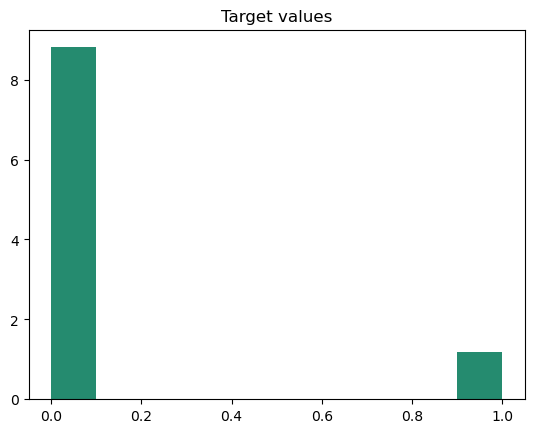

In [176]:
#TODO: visualiser y_train og y_test i et histogram
plt.title("Target values")
plt.hist(y_train, density=True, color="C0", label="train")
#plt.hist(y_test, density=True, color="C1", alpha=0.75, label="val")
plt.hist(y_test, density=True, color="C2", alpha=0.5, label="test")
plt.show() 

**Svar:**

*< Klassifisering fordi det er to valg i mellom >*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


In [8]:
#TODO: repeterte kryssvalideringer for to modeller

In [177]:
from sklearn.model_selection import RepeatedKFold
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV, cross_val_score

In [178]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)
#clf = RandomForestClassifier()

In [ ]:
# modell 1 : RandomForestClassifier

In [179]:
f1_score_clf = []
acc_score_clf = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)):
    #print(f'i = {i}')
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    #logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
    #logreg.fit(X_train_cv, y_train_cv)
    clf = RandomForestClassifier()
    clf.fit(X_train_cv, y_train_cv)
    
    #y_val_hat = logreg.predict_proba(X_val_cv)[:,1]
    y_val_hat = clf.predict_proba(X_val_cv)[:,1]
    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)

    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(2)

    f1_score_clf.append(score)
    acc_score_clf.append(score2)

In [ ]:
# modell 2: MLPClassifier

In [184]:
f1_score_mlp = []
acc_score_mlp = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)): 
    
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    #mlp = MLPClassifier(random_state=1, max_iter=10000,solver="sgd",learning_rate="adaptive")
    mlp = MLPClassifier()
    mlp.fit(X_train_cv, y_train_cv)
    
    y_val_hat = mlp.predict_proba(X_val_cv)[:,1]
    #print(f'y_hat {y_val_hat}')
    #print(f'y_val_cv {y_val_cv}')
    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)
    #print(f'score {(y_val_hat>0.5)*1}')
    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(4)
    
    #print("F1-score = ",score)
    f1_score_mlp.append(score)
    acc_score_mlp.append(score2)

In [109]:
#f1_score_mlp
#acc_score_mlp

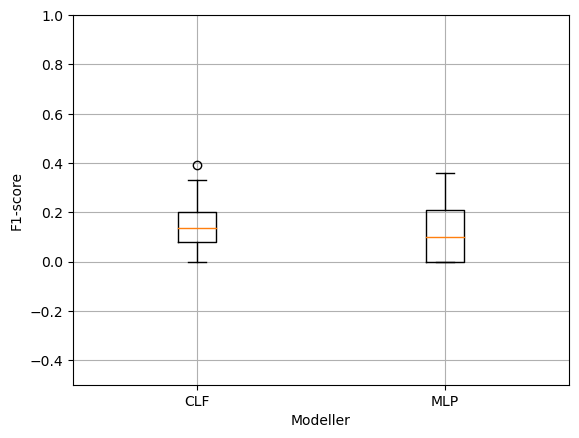

In [185]:
plt.boxplot([np.asarray(f1_score_clf),np.asarray(f1_score_mlp)])
plt.ylim(-0.5,1)
plt.xticks([1,2],["CLF","MLP"])
plt.ylabel("F1-score")
plt.xlabel("Modeller")
plt.grid()
plt.show()

In [186]:
# Fra ChatGPT 14.nov.2023
t_stat, p_value = ttest_rel(f1_score_clf, f1_score_mlp)

print(f't_stat : {t_stat}')
print(f'p_value : {p_value}')
# Check if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference in F1 scores is statistically significant.")
else:
    print("There is no significant difference in F1 scores.")

t_stat : 1.8725791623061236
p_value : 0.06709958768625876
There is no significant difference in F1 scores.


**Svar:**

*< modell 1 : RandomForestClassifier er nesten like lav som modell 2: MLPClassifier. Fra boxplot viser at f1_score av RandomForestClassifier er lit bedre enn f1_score av MLPClassifier og T-test viser at de ikke er statistisk signifikant. >*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [9]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

In [141]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score

In [171]:
#!pip install -U imbalanced-learn

In [138]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen 
#(bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)

In [193]:
sampler = SMOTE(random_state=1,k_neighbors=5)
X_train_upsample, y_train_upsample = sampler.fit_resample(X_train, y_train)

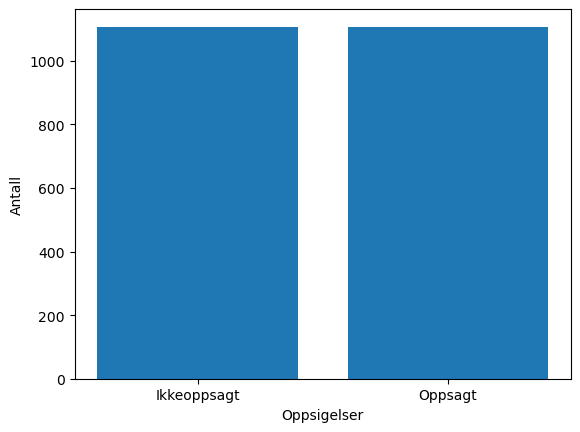

In [195]:
plt.bar(x=np.unique(y_train_upsample, return_counts=True)[0], height= np.unique(y_train_upsample, return_counts=True)[1])
plt.xticks([0,1],["Ikkeoppsagt", "Oppsagt"])
plt.xlabel("Oppsigelser")
plt.ylabel("Antall")
plt.savefig("Balanced.png")
plt.show()

In [ ]:
# Modell 1: RandomForestClassifier

In [242]:
sampler = SMOTE(random_state=1,k_neighbors=5)
f1_score_upsample_clf = []
acc_score_upsample_clf = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)): 
    
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_upsample, y_train_upsample = sampler.fit_resample(X_train_cv, y_train_cv)
    
    clf = RandomForestClassifier()
    clf.fit(X_train_upsample, y_train_upsample)
    
    y_val_hat = mlp.predict_proba(X_val_cv)[:,1]

    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)

    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(4)
    

    f1_score_upsample_clf.append(score)
    acc_score_upsample_clf.append(score2)

In [ ]:
# Modell 2: MLPClassifier

In [240]:
sampler = SMOTE(random_state=1,k_neighbors=5)
f1_score_upsample_mlp = []
acc_score_upsample_mlp = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)): 
    
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_upsample, y_train_upsample = sampler.fit_resample(X_train_cv, y_train_cv)
    
    mlp = MLPClassifier()
    mlp.fit(X_train_upsample, y_train_upsample)
    
    y_val_hat = mlp.predict_proba(X_val_cv)[:,1]

    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)

    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(4)
    

    f1_score_upsample_mlp.append(score)
    acc_score_upsample_mlp.append(score2)


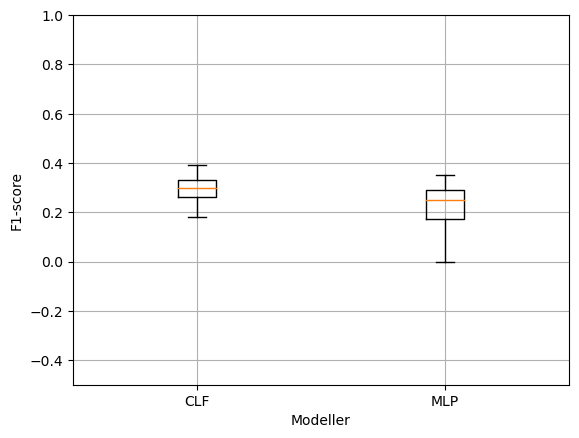

In [243]:
plt.boxplot([np.asarray(f1_score_upsample_clf),np.asarray(f1_score_upsample_mlp)])
plt.ylim(-0.5,1)
plt.xticks([1,2],["CLF","MLP"])
plt.ylabel("F1-score")
plt.xlabel("Modeller")
plt.grid()
plt.show()

In [199]:
# Fra ChatGPT 14.nov.2023
t_stat_upsample, p_value_upsample = ttest_rel(f1_score_upsample_clf, f1_score_upsample_mlp)

print(f't_stat : {t_stat_upsample}')
print(f'p_value : {p_value_upsample}')
# Check if the difference is statistically significant
alpha = 0.05
if p_value_upsample < alpha:
    print("The difference in F1 scores is statistically significant.")
else:
    print("There is no significant difference in F1 scores.")

t_stat : 13.716525609998627
p_value : 2.1122442490185474e-18
The difference in F1 scores is statistically significant.


**Svar:**

*< Modell 1:RandomForestClassifier  er bedre enn modell 2:MLPClassifier når de er oppsamplet. P_value fra oppgave 2.2 er lavere enn p_value fra oppgave 2.3 >*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [10]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

In [ ]:
# Tren den beste modellen fra 2.3: den beste modell er clf med oppsamplet data siden den får høyeste F1-score.

In [251]:
sampler = SMOTE(random_state=1,k_neighbors=5)
f1_score_upsample_clf = []
acc_score_upsample_clf = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)): 
    
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_upsample, y_train_upsample = sampler.fit_resample(X_train_cv, y_train_cv)
    
    clf = RandomForestClassifier()
    clf.fit(X_train_upsample, y_train_upsample)
    
    y_val_hat = mlp.predict_proba(X_val_cv)[:,1]

    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)

    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(4)
    

    f1_score_upsample_clf.append(score)
    acc_score_upsample_clf.append(score2)
    
print("F1-score = ",f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2))
print("Sensitivitet = ",recall_score(y_val_cv,(y_val_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_val_cv,(y_val_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_val_cv,(y_val_hat>0.5)*1).round(2))
print("Accuracy = ",accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(2))

F1-score =  0.25
Sensitivitet =  0.53
Spesifisitet =  0.62
Presisjon =  0.16
Accuracy =  0.61


### Svar 
F1-score =  0.25
Sensitivitet =  0.53
Spesifisitet =  0.62
Presisjon =  0.16
Accuracy =  0.61

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [11]:
#TODO: Gjør kjønnsbasert analyse på testdataene

In [203]:
#Split data

In [259]:
#X_val_cv.head()
X_test_female = X_val_cv[X_val_cv['Gender'] == 1]
X_test_male = X_val_cv[X_val_cv['Gender'] == 0]


In [ ]:
# Analyse av sensitivitet, spesifisitet og presisjon for menn

In [ ]:
# Analyse av sensitivitet, spesifisitet og presisjon for Kvinner

In [261]:
sampler = SMOTE(random_state=1,k_neighbors=5)
f1_score_upsample_clf = []
acc_score_upsample_clf = []
for i, (train_male_index, val_index) in enumerate(rkf.split(X_train)): 
    
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_upsample, y_train_upsample = sampler.fit_resample(X_train_cv, y_train_cv)
    
    clf = RandomForestClassifier()
    clf.fit(X_train_upsample, y_train_upsample)
    
    y_val_hat = mlp.predict_proba(X_test_male)[:,1]

    
    score = f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2)

    score2 = accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(4)
    

    #f1_score_upsample_clf.append(score)
    #acc_score_upsample_clf.append(score2)
#y_val_hat_male = y_val_hat[y_val_hat['Gender'] == 0]   
print("F1-score Male = ",f1_score(y_val_cv,(y_val_hat>0.5)*1,average='binary').round(2))
print("Sensitivitet Male = ",recall_score(y_val_cv,(y_val_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet Male = ",recall_score(y_val_cv,(y_val_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon Male = ",precision_score(y_val_cv,(y_val_hat>0.5)*1).round(2))
print("Accuracy Male = ",accuracy_score(y_val_cv,(y_val_hat>0.5)*1).round(2))

ValueError: Found input variables with inconsistent numbers of samples: [163, 155]

In [ ]:
# Jeg klarer ikke å filtere både X og y data samtidlig. Så sammenligning fungere ikke

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [262]:
!pip freeze > requirements.txt